In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv("/content/Train_Data.csv")

In [ ]:
df.head()


,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [ ]:
df.tail()

,age,sex,bmi,smoker,region,children,charges
3625,48.820767,female,41.426984,no,northwest,4,10987.324964
3626,38.661977,female,26.202557,no,southeast,2,11735.844352
3627,56.000000,male,40.300000,no,southwest,0,10602.385000
3628,48.061207,female,34.930624,no,southeast,1,8976.140452
3629,37.598865,female,25.219233,no,northeast,3,7027.698968


In [ ]:
df.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

Text(0.5, 1.0, 'age v/s charges')

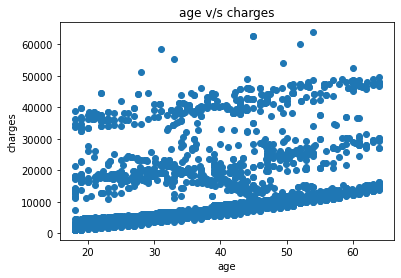

In [ ]:
x = df.age
y = df.charges


plt.scatter(x,y)
plt.xlabel("age")
plt.ylabel("charges")
plt.title("age v/s charges")

In [ ]:
import seaborn as sns

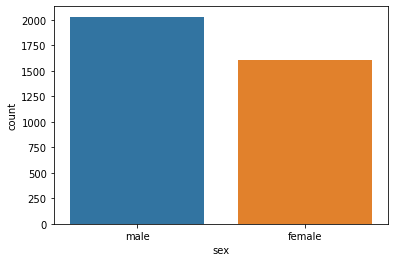

In [ ]:
sns.countplot(x = "sex", data = df)

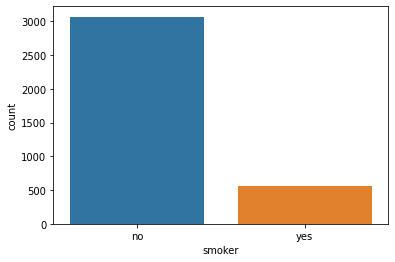

In [ ]:
sns.countplot(x="smoker", data=df)

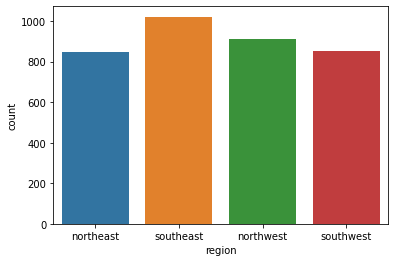

In [ ]:
sns.countplot(x= "region", data = df)

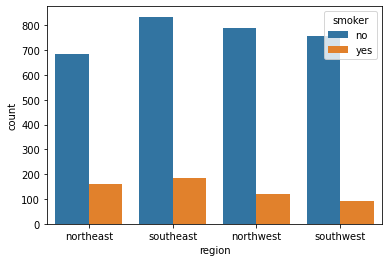

In [ ]:
sns.countplot(x = "region", hue = "smoker",data = df)

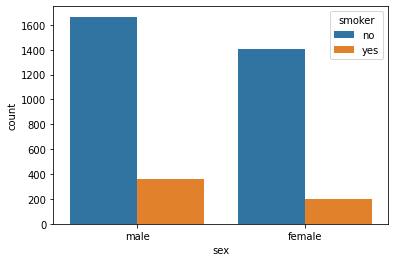

In [ ]:
sns.countplot(x = "sex", hue = "smoker",data = df)

In [ ]:
X = d1f.drop(["charges","region"],axis = 1)
Y = d1f.charges

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
x_train.shape

(2904, 5)

In [ ]:
X.shape

(3630, 5)

In [ ]:
model = RandomForestRegressor()


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
labels = label_encoder.fit_transform(df.sex)
df["Sex"] = labels

In [ ]:
labels1 = label_encoder.fit_transform(df.smoker)
df["Smoker"] = labels1

In [ ]:
d1f = df.drop(["sex","smoker"],axis = 1)

In [ ]:
d1f

,age,bmi,region,children,charges,Sex,Smoker
0,21.000000,25.745000,northeast,2,3279.868550,1,0
1,36.976978,25.744165,southeast,3,21454.494239,0,1
2,18.000000,30.030000,southeast,1,1720.353700,1,0
3,37.000000,30.676891,northeast,3,6801.437542,1,0
4,58.000000,32.010000,southeast,1,11946.625900,1,0
...,...,...,...,...,...,...,...
3625,48.820767,41.426984,northwest,4,10987.324964,0,0
3626,38.661977,26.202557,southeast,2,11735.844352,0,0
3627,56.000000,40.300000,southwest,0,10602.385000,1,0
3628,48.061207,34.930624,southeast,1,8976.140452,0,0


In [ ]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
x_test

,age,bmi,children,Sex,Smoker
2357,44.417865,27.015080,5,0,0
3611,31.150026,28.335327,4,1,0
1417,24.000000,23.400000,0,1,0
579,34.710152,39.385692,4,1,0
1349,50.000000,28.160000,3,0,0
...,...,...,...,...,...
816,28.770540,24.963695,2,1,0
2487,41.000000,28.310000,1,0,0
3093,42.000000,32.870000,0,0,0
2473,35.185034,34.707089,2,0,0


In [ ]:
model.predict([[48.2111,36.86,4,0,0]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([10788.08859361])

In [ ]:
model.score(x_train,y_train)

0.9832641610044419

In [ ]:
model.score(x_test,y_test)

0.8990095894623549

Saving machine learning model


In [ ]:
import pickle 
filename = "Trained_model.sav"
pickle.dump(model,open(filename,"wb"))

In [ ]:
# loading the saved model 
loaded_model = pickle.load(open("Trained_model.sav","rb"))

In [ ]:
input_data = ([[48.2111,36.86,4,0,0]])
prediction = loaded_model.predict(input_data)

print(prediction)

[10788.08859361]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
